In [160]:
import numpy as np
from utils import *
import matplotlib.pyplot as plt
import pandas as pd

In [161]:
# Get file paths
base_path = 'd:/data/rnp/'
mtrack_paths = get_file_paths(base_path, keyword='mtrack', extension='mat', print_paths=False)
spike_paths = get_file_paths(base_path, keyword='spike_times', extension='mat', print_paths=False)
cluster_paths = get_file_paths(base_path, keyword='cluster_ids', extension='mat', print_paths=False)

spike_paths = filter_paths(spike_paths, mtrack_paths)
cluster_paths = filter_paths(cluster_paths, mtrack_paths)
print(f"Filtered spike paths to {len(spike_paths)} files")
print(f"Filtered cluster paths to {len(cluster_paths)} files")

Found 34 mtrack.mat files
Found 41 spike_times.mat files
Found 41 cluster_ids.mat files
Filtered spike paths to 34 files
Filtered cluster paths to 34 files


In [162]:
# Check paths by eye, if desired.
check_paths =  pd.DataFrame({'mtrack': mtrack_paths, 'spike_times': spike_paths})
check_paths

,mtrack,spike_times
0,d:\data\rnp\4122\4\mtrack.mat,d:\data\rnp\4122\4\spike_times.mat
1,d:\data\rnp\4122\5\mtrack.mat,d:\data\rnp\4122\5\spike_times.mat
2,d:\data\rnp\4122\6\mtrack.mat,d:\data\rnp\4122\6\spike_times.mat
3,d:\data\rnp\4127\2\mtrack.mat,d:\data\rnp\4127\2\spike_times.mat
4,d:\data\rnp\4127\3\mtrack.mat,d:\data\rnp\4127\3\spike_times.mat
5,d:\data\rnp\4127\4\mtrack.mat,d:\data\rnp\4127\4\spike_times.mat
6,d:\data\rnp\4127\5\mtrack.mat,d:\data\rnp\4127\5\spike_times.mat
7,d:\data\rnp\4127\6\mtrack.mat,d:\data\rnp\4127\6\spike_times.mat
8,d:\data\rnp\4127\7\mtrack.mat,d:\data\rnp\4127\7\spike_times.mat
9,d:\data\rnp\4127\8\mtrack.mat,d:\data\rnp\4127\8\spike_times.mat


In [163]:
# Pick session by path index
session = 25
cluster = 4  # Cluster to test

# session = -1
# cluster = 153  # Jagged trajectory

# Load a tracking file
mtrack = load_mat_file(mtrack_paths[session]) 

# Load a spike_times file
spike_times = load_mat_file(spike_paths[session]) 
spike_times = spike_times / 30  # Resample to 1000 Hz

# Load a cluster_ids file
cluster_ids = load_mat_file(cluster_paths[session])
cl_idx = np.where(cluster_ids == cluster)[0]  # Cluster to test

# Convert to Pandas and name columns
columns = {0: 'frame_ms', 1: 'head_x', 2: 'body_x', 3: 'head_y', 4: 'body_y'}
mtrack = pd.DataFrame(mtrack)
mtrack = mtrack.rename(columns = columns)

# Get mouse and session ids
session_id = mtrack_paths[session].parts[-2]
mouse_id = mtrack_paths[session].parts[-3]

In [164]:
print("cluster_ids:")
print(*np.unique(cluster_ids))
print(f"spike_times shape: {spike_times.shape}, max: {np.max(spike_times)}, min: {np.min(spike_times)}")
mtrack

cluster_ids:
1 2 4 7 8 9 11 19 20 32 41 45 46 47 48 49 50 51 56 57 59 63 66 68 70 72 77 81 82 87 89 92 93 95 106 108 112 113 114 118 123 126 127 129 130 131 132 133 134 135 136 137 140 141 145 146 147 148 151 153 154 156 157 159 160 161 165 166 171 172 175 176 178 183 184 185 186 188 189 190 191 192 193 194 196 200 201 202 203 207 208 209 215 219 220 222 223 224 225 227 230 232 234 235 236 237 238 239 240 241 245 246 249 252 253 254 258 259 260 261 263 264 265 266 267 268 269 270 271 272 274 275 278 280
spike_times shape: (2358574, 1), max: 5021135.733333333, min: 6.366666666666666


,frame_ms,head_x,body_x,head_y,body_y
0,6.0,NaN,NaN,NaN,NaN
1,16.0,NaN,NaN,NaN,NaN
2,26.0,NaN,NaN,NaN,NaN
3,36.0,NaN,NaN,NaN,NaN
4,46.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
621178,6213654.0,NaN,NaN,NaN,NaN
621179,6213664.0,NaN,NaN,NaN,NaN
621180,6213674.0,NaN,NaN,NaN,NaN
621181,6213684.0,NaN,NaN,NaN,NaN


In [165]:
spike_times = spike_times[cl_idx]

# Vectorized approach - much faster than looping
spike_times_flat = spike_times.flatten()
frame_ms_values = mtrack['frame_ms'].values

# Use searchsorted to find insertion points
indices = np.searchsorted(frame_ms_values, spike_times_flat)

# Clip indices to valid range
indices = np.clip(indices, 1, len(frame_ms_values) - 1)

# Check if the left or right neighbor is closer
left_diff = np.abs(spike_times_flat - frame_ms_values[indices - 1])
right_diff = np.abs(spike_times_flat - frame_ms_values[indices])
closest_indices = np.where(left_diff < right_diff, indices - 1, indices)

# Create the result DataFrame directly using vectorized indexing
spike_positions_df = pd.DataFrame({
    'spike_time': spike_times_flat,
    'frame_ms': frame_ms_values[closest_indices],
    'head_x': mtrack['head_x'].values[closest_indices],
    'head_y': mtrack['head_y'].values[closest_indices]
})

### Spike Info

In [166]:
# Check spikes
print(f"n_spikes = {len(spike_positions_df)}")
spike_positions_df[:5]  # Show first 5 rows

n_spikes = 709


,spike_time,frame_ms,head_x,head_y
0,554029.333333,554033.0,NaN,NaN
1,554398.266667,554394.0,NaN,NaN
2,555865.233333,555864.0,NaN,NaN
3,555870.766667,555874.0,NaN,NaN
4,555874.966667,555874.0,NaN,NaN


Text(0.5, 1.0, 'Trajectory and Spike Positions - Mouse 4131, Session 17 - Cl4')

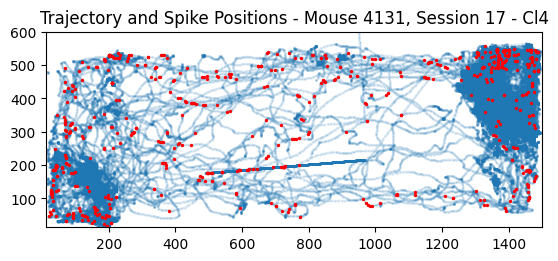

In [167]:
plt.plot(mtrack['head_x'], mtrack['head_y'], marker='o', ms=1, alpha=.1)
plt.scatter(spike_positions_df['head_x'], spike_positions_df['head_y'], marker='o', s=2, color='red', alpha=1, zorder=2)
plt.xlim([mtrack['head_x'].min(), mtrack['head_x'].max()])
plt.ylim([mtrack['head_y'].min(), mtrack['head_y'].max()])
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f'Trajectory and Spike Positions - Mouse {mouse_id}, Session {session_id} - Cl{cluster}')

### Calculate Occupancy and Spike Histograms

In [168]:
# Define grid dimensions
grid_shape = (12, 5)  # 12 bins for x, 5 bins for y

# Define bin edges based on the data range
x_edges = np.linspace(mtrack['head_x'].min(), mtrack['head_x'].max(), grid_shape[0] + 1)
y_edges = np.linspace(mtrack['head_y'].min(), mtrack['head_y'].max(), grid_shape[1] + 1)

# Compute occupancy histogram (time spent in each bin)
occupancy_hist, x_edges, y_edges = np.histogram2d(
    mtrack['head_x'], 
    mtrack['head_y'], 
    bins=[x_edges, y_edges]
)

# Compute spike histogram (number of spikes in each bin)
spike_hist, _, _ = np.histogram2d(
    spike_positions_df['head_x'], 
    spike_positions_df['head_y'], 
    bins=[x_edges, y_edges]
)

print(f"Occupancy histogram shape: {occupancy_hist.shape}")
print(f"Spike histogram shape: {spike_hist.shape}")
print(f"Total occupancy counts: {occupancy_hist.sum()}")
print(f"Total spike counts: {spike_hist.sum()}")

Occupancy histogram shape: (12, 5)
Spike histogram shape: (12, 5)
Total occupancy counts: 563330.0
Total spike counts: 696.0


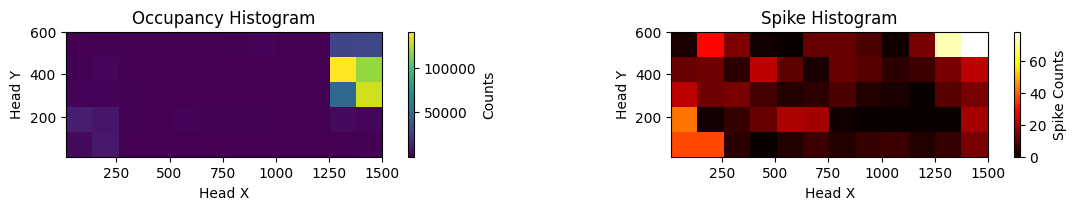

In [169]:
# Plot occupancy histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 2))

# Occupancy histogram
im1 = ax1.imshow(occupancy_hist.T, origin='lower', aspect='equal', cmap='viridis',
                 extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
ax1.set_xlabel('Head X')
ax1.set_ylabel('Head Y')
ax1.set_title('Occupancy Histogram')
plt.colorbar(im1, ax=ax1, label='Counts')

# Spike histogram
im2 = ax2.imshow(spike_hist.T, origin='lower', aspect='equal', cmap='hot',
                 extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
ax2.set_xlabel('Head X')
ax2.set_ylabel('Head Y')
ax2.set_title('Spike Histogram')
plt.colorbar(im2, ax=ax2, label='Spike Counts')

plt.tight_layout()
plt.show()

### Spike Rate Histogram

In [170]:
# Compute spike rate histogram (spikes/sec)
# First, convert occupancy counts to time in seconds
# Each frame represents one timestamp, so we need to know the sampling rate
# From the data, frame_ms is in milliseconds, so we can calculate the time bin duration

# Calculate the time per frame (sampling interval)
frame_diff = np.diff(mtrack['frame_ms'].values[:100])  # Sample first 100 frames
median_frame_interval = np.median(frame_diff)  # in milliseconds
time_per_frame = median_frame_interval / 1000  # convert to seconds

# Convert occupancy histogram from frame counts to time in seconds
occupancy_time = occupancy_hist * time_per_frame

# Set minimum occupancy threshold
min_occupancy_ms = 1000  # milliseconds
min_occupancy_s = min_occupancy_ms / 1000  # convert to seconds

# Compute spike rate (spikes per second)
# Only compute for bins with sufficient occupancy
# Bins that don't meet threshold will be NaN
spike_rate = np.divide(spike_hist, occupancy_time, 
                       out=np.full_like(spike_hist, np.nan, dtype=float), 
                       where=occupancy_time >= min_occupancy_s)

# Count bins that meet the threshold
valid_bins = np.sum(occupancy_time >= min_occupancy_s)
total_bins = occupancy_time.size

print(f"Median frame interval: {median_frame_interval:.2f} ms")
print(f"Time per frame: {time_per_frame:.4f} seconds")
print(f"Minimum occupancy threshold: {min_occupancy_ms} ms")
print(f"Valid bins (>= {min_occupancy_ms} ms): {valid_bins}/{total_bins}")
print(f"Max spike rate: {np.nanmax(spike_rate):.2f} Hz")
print(f"Mean spike rate (valid bins): {np.mean(spike_rate[spike_rate > 0]):.2f} Hz")

Median frame interval: 10.00 ms
Time per frame: 0.0100 seconds
Minimum occupancy threshold: 1000 ms
Valid bins (>= 1000 ms): 60/60
Max spike rate: 4.65 Hz
Mean spike rate (valid bins): 1.31 Hz


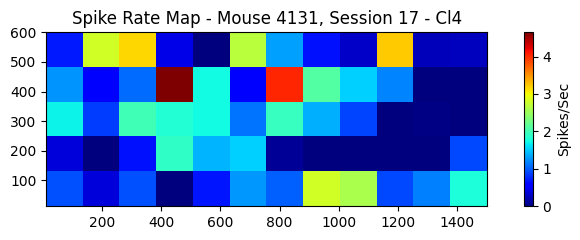

In [171]:
# Plot spike rate histogram
plt.figure(figsize=(8, 2.5))
im = plt.imshow(spike_rate.T, origin='lower', aspect='equal', cmap='jet',
                extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
plt.title(f"Spike Rate Map - Mouse {mouse_id}, Session {session_id} - Cl{cluster}")
plt.colorbar(im, label='Spikes/Sec')
plt.tight_layout()
plt.show()

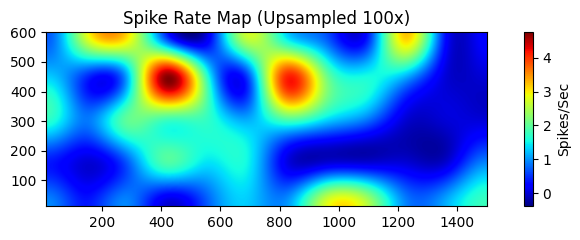

In [172]:
# Create upsampled version of spike rate map using interpolation
from scipy.ndimage import zoom

# Upsampling factor (e.g., 10x means 10 times more pixels)
upsample_factor = 100

# Create a mask of valid (non-NaN) values
valid_mask = ~np.isnan(spike_rate.T)

# Replace NaNs with 0 for interpolation
spike_rate_filled = np.nan_to_num(spike_rate.T, nan=0.0)

# Upsample both the data and the mask
spike_rate_upsampled = zoom(spike_rate_filled, upsample_factor, order=3)
mask_upsampled = zoom(valid_mask.astype(float), upsample_factor, order=3)

# Restore NaNs where the upsampled mask is below threshold (0.5)
spike_rate_upsampled[mask_upsampled < 0.5] = np.nan

# Plot upsampled spike rate histogram
plt.figure(figsize=(8, 2.5))
im = plt.imshow(spike_rate_upsampled, origin='lower', aspect='equal', cmap='jet',
                extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]],
                interpolation='bilinear')
plt.title(f"Spike Rate Map (Upsampled {upsample_factor}x)")
plt.colorbar(im, label='Spikes/Sec')
plt.tight_layout()
plt.show()

### Calculate Skaggs SI

In [173]:
# Calculate Skaggs spatial information
# Formula: I = Σ p_i * (r_i / r_mean) * log2(r_i / r_mean)
# where p_i is occupancy probability, r_i is firing rate in bin i

# Flatten arrays for easier computation
spike_rate_flat = spike_rate.flatten()
occupancy_time_flat = occupancy_time.flatten()

# Calculate occupancy probability for each bin
total_time = np.sum(occupancy_time_flat)
p_i = occupancy_time_flat / total_time

# Calculate mean firing rate (weighted by occupancy)
# Only include bins that meet the threshold (non-NaN values)
valid_mask = ~np.isnan(spike_rate_flat)
r_mean = np.sum(spike_rate_flat[valid_mask] * p_i[valid_mask]) / np.sum(p_i[valid_mask])

# Calculate spatial information
# Only compute for valid bins with non-zero firing rates
spatial_info = 0
for i in range(len(spike_rate_flat)):
    if valid_mask[i] and spike_rate_flat[i] > 0:
        ratio = spike_rate_flat[i] / r_mean
        spatial_info += p_i[i] * ratio * np.log2(ratio)

print(f"Mean firing rate: {r_mean:.3f} Hz")
print(f"Skaggs spatial information: {spatial_info:.3f} bits/spike")

Mean firing rate: 0.124 Hz
Skaggs spatial information: 2.307 bits/spike


### Calculate SSI

In [174]:
# Compute SSI (Significance of Spatial Information) using circular shuffle permutation test
n_permutations = 1000
null_si_distribution = np.zeros(n_permutations)

# Get the total recording duration
recording_duration = mtrack['frame_ms'].max() - mtrack['frame_ms'].min()

print(f"Running {n_permutations} permutations...")

for perm in range(n_permutations):
    # Randomly shift spike times circularly
    shift_amount = np.random.uniform(0, recording_duration)
    shifted_spike_times = spike_times_flat + shift_amount
    
    # Wrap around for circular shift
    shifted_spike_times = np.where(shifted_spike_times > mtrack['frame_ms'].max(), 
                                    shifted_spike_times - recording_duration, 
                                    shifted_spike_times)
    
    # Find closest positions for shifted spikes
    shifted_indices = np.searchsorted(frame_ms_values, shifted_spike_times)
    shifted_indices = np.clip(shifted_indices, 1, len(frame_ms_values) - 1)
    
    # Check if left or right neighbor is closer
    left_diff_shift = np.abs(shifted_spike_times - frame_ms_values[shifted_indices - 1])
    right_diff_shift = np.abs(shifted_spike_times - frame_ms_values[shifted_indices])
    shifted_closest = np.where(left_diff_shift < right_diff_shift, shifted_indices - 1, shifted_indices)
    
    # Compute spike histogram for shifted data
    shifted_spike_hist, _, _ = np.histogram2d(
        mtrack['head_x'].values[shifted_closest],
        mtrack['head_y'].values[shifted_closest],
        bins=[x_edges, y_edges]
    )
    
    # Compute spike rate for shifted data
    shifted_spike_rate = np.divide(shifted_spike_hist, occupancy_time, 
                                    out=np.full_like(shifted_spike_hist, np.nan, dtype=float), 
                                    where=occupancy_time >= min_occupancy_s)
    
    # Calculate Skaggs SI for this permutation
    shifted_rate_flat = shifted_spike_rate.flatten()
    shifted_valid_mask = ~np.isnan(shifted_rate_flat)
    shifted_r_mean = np.sum(shifted_rate_flat[shifted_valid_mask] * p_i[shifted_valid_mask]) / np.sum(p_i[shifted_valid_mask])
    
    perm_si = 0
    for i in range(len(shifted_rate_flat)):
        if shifted_valid_mask[i] and shifted_rate_flat[i] > 0:
            ratio = shifted_rate_flat[i] / shifted_r_mean
            perm_si += p_i[i] * ratio * np.log2(ratio)
    
    null_si_distribution[perm] = perm_si
    
    if (perm + 1) % 100 == 0:
        print(f"  Completed {perm + 1}/{n_permutations} permutations")

# Calculate statistics
null_mean = np.mean(null_si_distribution)
null_std = np.std(null_si_distribution)
z_score = (spatial_info - null_mean) / null_std
is_significant = z_score >= 3

# Calculate p-values
# Empirical p-value (one-tailed test: how many permutations have SI >= original SI)
p_value_empirical = np.sum(null_si_distribution >= spatial_info) / n_permutations

# Parametric p-value (assuming normal distribution)
from scipy.stats import norm
p_value_parametric = 1 - norm.cdf(z_score)

print(f"\nOriginal SI: {spatial_info:.3f} bits/spike")
print(f"Null distribution mean: {null_mean:.3f} bits/spike")
print(f"Null distribution std: {null_std:.3f}")
print(f"Z-score: {z_score:.3f}")
print(f"P-value (empirical): {p_value_empirical:.4f}")
print(f"P-value (parametric): {p_value_parametric:.4f}")
print(f"Significant (z >= 3): {is_significant}")

Running 1000 permutations...
  Completed 100/1000 permutations
  Completed 200/1000 permutations
  Completed 300/1000 permutations
  Completed 400/1000 permutations
  Completed 500/1000 permutations
  Completed 600/1000 permutations
  Completed 700/1000 permutations
  Completed 800/1000 permutations
  Completed 900/1000 permutations
  Completed 1000/1000 permutations

Original SI: 2.307 bits/spike
Null distribution mean: 0.667 bits/spike
Null distribution std: 0.281
Z-score: 5.827
P-value (empirical): 0.0000
P-value (parametric): 0.0000
Significant (z >= 3): True


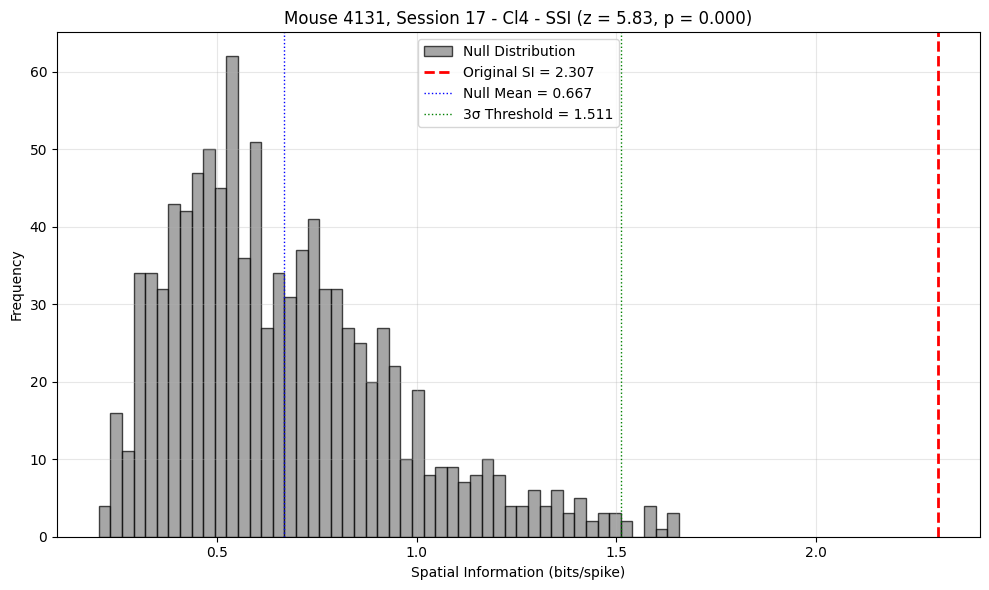

In [175]:
# Plot null distribution with original SI value
plt.figure(figsize=(10, 6))
plt.hist(null_si_distribution, bins=50, alpha=0.7, color='gray', edgecolor='black', label='Null Distribution')
plt.axvline(spatial_info, color='red', linewidth=2, linestyle='--', label=f'Original SI = {spatial_info:.3f}')
plt.axvline(null_mean, color='blue', linewidth=1, linestyle=':', label=f'Null Mean = {null_mean:.3f}')
plt.axvline(null_mean + 3*null_std, color='green', linewidth=1, linestyle=':', label=f'3σ Threshold = {null_mean + 3*null_std:.3f}')
plt.xlabel('Spatial Information (bits/spike)')
plt.ylabel('Frequency')
plt.title(f'Mouse {mouse_id}, Session {session_id} - Cl{cluster} - SSI (z = {z_score:.2f}, p = {p_value_parametric:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()